Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

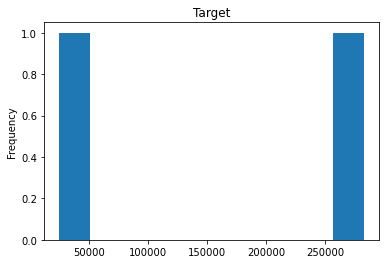

In [3]:
df_train= pd.read_csv('application_train.csv')
df_train.head()
df_train['TARGET'].value_counts()
df_train['TARGET'].value_counts().plot.hist(title="Target");

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

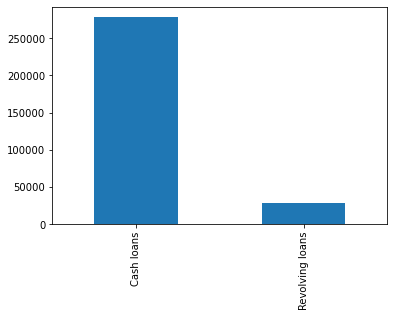

In [4]:
display(df_train['NAME_CONTRACT_TYPE'].value_counts())
df_train['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar');

In [5]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Treating Missing values

In [6]:
#examine for the null value
def missing_values(df):
    missing_value = df.isnull().sum()
    missing_value_percentage = df.isnull().sum()/len(df)
    #to create the table of missing value
    missing_value_table = pd.concat([missing_value,missing_value_percentage],axis=1)
    rename_columns = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : 'Missing percentage'})
    rename_columns = rename_columns[
            rename_columns.iloc[:,1] != 0].sort_values(
        'Missing percentage', ascending=False).round(1)
    return rename_columns

In [7]:
missing = missing_values(df_train)
missing_more_than_60 = missing.loc[missing['Missing percentage']>=0.6]
missing_more_than_60index = missing_more_than_60.index
missing_more_than_60list = list(missing_more_than_60index)
missing_more_than_60list

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG']

Dropping cell which has missing percentage greater than 60

In [8]:
df_train.drop(missing_more_than_60list,axis=1,inplace=True)

In [9]:

df_train.dtypes.value_counts()

int64      41
float64    39
object     15
dtype: int64

In [10]:
df_train.select_dtypes('object').apply(pd.Series.nunique,axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [11]:

#using labelencoder to covert the categorical data
le = LabelEncoder()
le_count = 0
for col in df_train:
    if df_train[col].dtypes == object:
        if len(list(df_train[col].unique())) <= 2:
            le.fit(df_train[col])
            df_train[col] = le.transform(df_train[col])
            le_count += 1
        

One hot code encoding for categorical values

In [ ]:
df_trainonehot = pd.get_dummies(df_train)
#app_test = pd.get_dummies(app_test)

print('Training Features shape: ', df_trainonehot.shape)
#print('Testing Feature shape: ', app_test.shape)

In [13]:
(df_train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [14]:
df_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

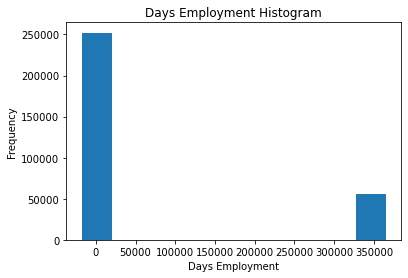

In [15]:
df_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [16]:
anom = df_train[df_train['DAYS_EMPLOYED'] == 365243]
non_anom = df_train[df_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


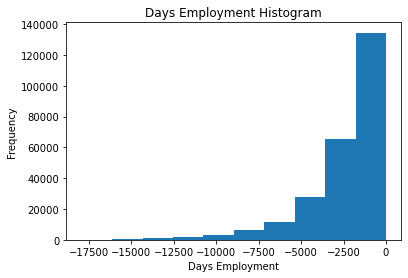

In [17]:

df_train['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)
df_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram');
plt.xlabel('Days Employment');

In [18]:
#now we find out the correlation of data
correlation = df_train.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlation.tail(15))
print('\nMost Negative Correlations:\n', correlation.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199


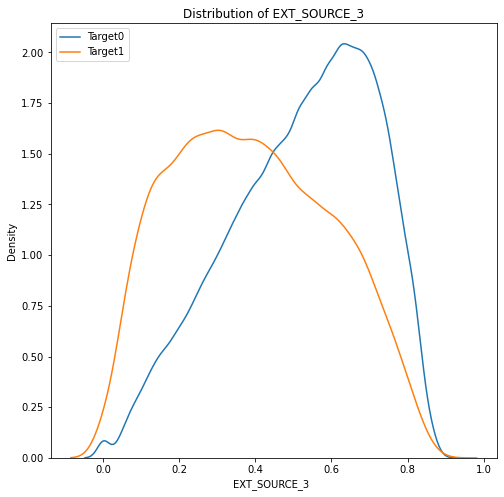

In [19]:
plt.figure(figsize=(8,8))
#kernel density plot of loan that were repaid at the time
sns.kdeplot(df_train.loc[df_train['TARGET']==0,'EXT_SOURCE_3'], label='Target0')
#kernel density plot of loan that were not repaid at the time
sns.kdeplot(df_train.loc[df_train['TARGET']==1,'EXT_SOURCE_3'], label='Target1')
plt.xlabel('EXT_SOURCE_3  '); plt.ylabel('Density'); plt.title('Distribution of EXT_SOURCE_3')
plt.legend(loc='upper left')

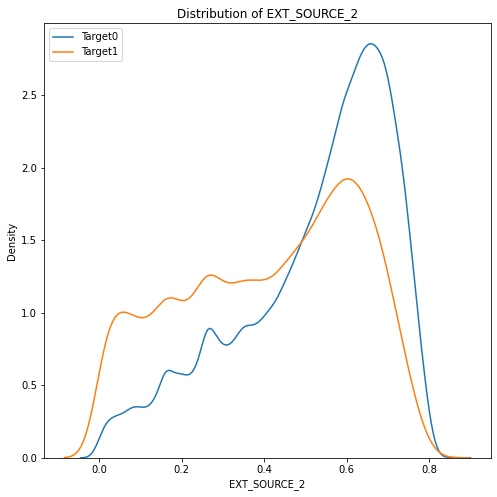

In [20]:
plt.figure(figsize=(8,8))
#kernel density plot of loan that were repaid at the time
sns.kdeplot(df_train.loc[df_train['TARGET']==0,'EXT_SOURCE_2'], label='Target0')
#kernel density plot of loan that were not repaid at the time
sns.kdeplot(df_train.loc[df_train['TARGET']==1,'EXT_SOURCE_2'], label='Target1')
plt.xlabel('EXT_SOURCE_2'); plt.ylabel('Density'); plt.title('Distribution of EXT_SOURCE_2')
plt.legend(loc='upper left')

In [21]:
#df_train['CODE_GENDER'].value_counts().plot(kind='bar')
#male:0
#female:1
gender_only_MF = df_train[df_train['CODE_GENDER']!= 'XNA']


<AxesSubplot:>

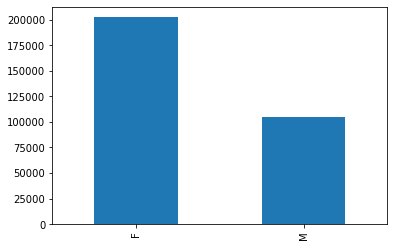

In [22]:
gender_only_MF['CODE_GENDER'].value_counts().plot(kind='bar')

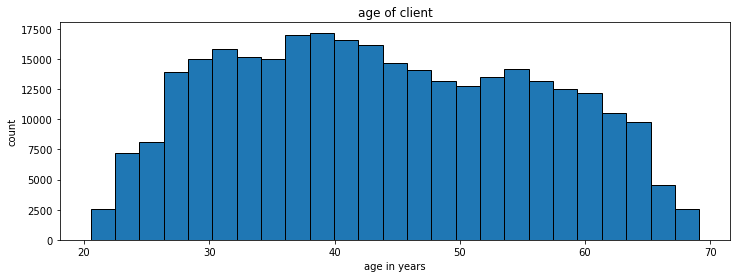

In [23]:
# to find falilure to repay by age group
plt.figure(figsize=(12,4))
plt.hist(df_train['DAYS_BIRTH']/-365,bins=25,edgecolor='black')
plt.title('age of client')
plt.xlabel('age in years')
plt.ylabel('count');

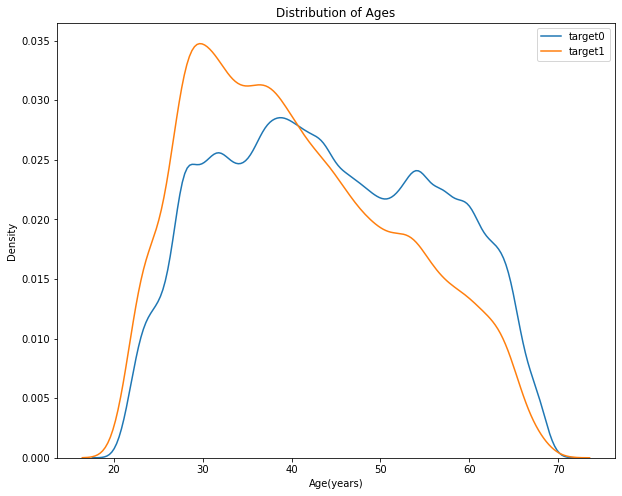

In [24]:
plt.figure(figsize = (10,8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df_train.loc[df_train['TARGET']==0, 'DAYS_BIRTH']/-365, label='target0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_train.loc[df_train['TARGET']==1, 'DAYS_BIRTH']/-365, label='target1')

# Labeling of plot
plt.xlabel('Age(years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.legend(loc='upper right');


In [25]:
age = df_train[['TARGET','DAYS_BIRTH']]
age['AGE_IN_YEAR']  = age['DAYS_BIRTH']/-365
#bining the age to 
age['YEARS_BINNED'] = pd.cut(age['AGE_IN_YEAR'], bins=np.linspace(20,70,num=11))
age.head()

<ipython-input-25-ce0e000a2417>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['AGE_IN_YEAR']  = age['DAYS_BIRTH']/-365
<ipython-input-25-ce0e000a2417>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['YEARS_BINNED'] = pd.cut(age['AGE_IN_YEAR'], bins=np.linspace(20,70,num=11))


,TARGET,DAYS_BIRTH,AGE_IN_YEAR,YEARS_BINNED
0,1,-9461,25.920548,"(25.0, 30.0]"
1,0,-16765,45.931507,"(45.0, 50.0]"
2,0,-19046,52.180822,"(50.0, 55.0]"
3,0,-19005,52.068493,"(50.0, 55.0]"
4,0,-19932,54.608219,"(50.0, 55.0]"


In [26]:
age_groups = age.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,AGE_IN_YEAR
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,-8532.795625,23.377522
"(25.0, 30.0]",0.111436,-10155.219250,27.822518
"(30.0, 35.0]",0.102814,-11854.848377,32.479037
"(35.0, 40.0]",0.089414,-13707.908253,37.555913
"(40.0, 45.0]",0.078491,-15497.661233,42.459346
"(45.0, 50.0]",0.074171,-17323.900441,47.462741
"(50.0, 55.0]",0.066968,-19196.494791,52.593136
"(55.0, 60.0]",0.055314,-20984.262742,57.491131
"(60.0, 65.0]",0.052737,-22780.547460,62.412459


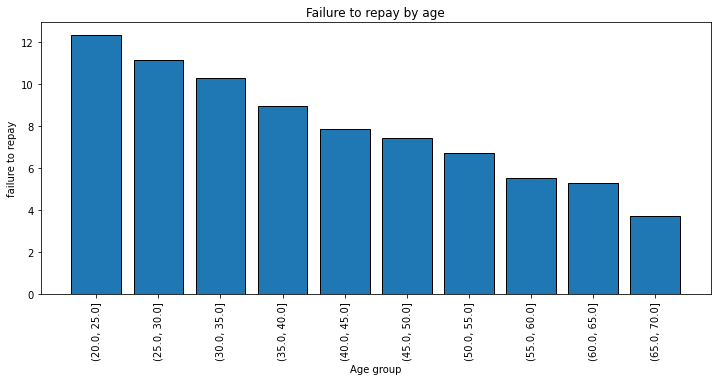

In [27]:

plt.figure(figsize=(12,5))
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'],edgecolor='black')
plt.title('Failure to repay by age')
plt.xlabel('Age group')
plt.ylabel('failure to repay')
plt.xticks(rotation='vertical');

In [28]:
df_train = df_trainonehot
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#imputer to fill null values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(df_train)
complete_data = imputer.transform(df_train)
print(complete_data.shape)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


(307511, 213)


In [30]:
complete_data = pd.DataFrame(data=complete_data,columns=df_trainonehot.columns)
complete_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002.0,1.0,0.0,0.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,100003.0,0.0,0.0,0.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,100004.0,0.0,1.0,1.0,1.0,0.0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,0.0,0.0,1.0,0.0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007.0,0.0,0.0,0.0,1.0,0.0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251.0,0.0,0.0,0.0,0.0,0.0,157500.0,254700.0,27558.0,225000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
307507,456252.0,0.0,0.0,0.0,1.0,0.0,72000.0,269550.0,12001.5,225000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
307508,456253.0,0.0,0.0,0.0,1.0,0.0,153000.0,677664.0,29979.0,585000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
307509,456254.0,1.0,0.0,0.0,1.0,0.0,171000.0,370107.0,20205.0,319500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [31]:
#splitting the data set
from sklearn.model_selection import train_test_split
X_train,X_test,ytrain,ytest = train_test_split(complete_data.drop(['TARGET'],axis=1),complete_data['TARGET'],
                                               test_size=0.3,random_state=42)

In [32]:
#normalization
from sklearn.preprocessing import StandardScaler,MinMaxScaler
def normalize(norm,train):
    if norm==1:
        scale = StandardScaler()
    else:
        scale = MinMaxScaler()
    norm = scale.fit_transform(train)
    return norm


In [33]:
train_xnorm = normalize(1,X_train)
train_xtestnorm = normalize(1,X_test)

In [34]:
#logistic regression
from sklearn.linear_model  import LogisticRegression
log = LogisticRegression(penalty='l2',C=0.05,max_iter=500)
log.fit(train_xnorm,ytrain)


LogisticRegression(C=0.05, max_iter=500)

In [35]:
log.score(train_xtestnorm,ytest)
yhat = log.predict(train_xtestnorm)

In [36]:
#model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,roc_auc_score,roc_curve,auc
accuracy = accuracy_score(y_true =ytest, y_pred= yhat)
precision = precision_score(y_true=ytest, y_pred=yhat)
recall= recall_score(y_true=ytest, y_pred=yhat)
print(accuracy,precision,recall)

0.9195698831486981 0.480225988700565 0.011466342911102118


In [37]:
#confusuin matrix 
cm = confusion_matrix(ytest,yhat)
cm

array([[84749,    92],
       [ 7328,    85]], dtype=int64)

In [38]:
#auc and roc score
ar = roc_auc_score(ytest,yhat)
print(ar)

0.5051909807694441


In [39]:
#aucroc curve
prob = log.predict_proba(train_xtestnorm)
pred = prob[:,1]
fpr, tpr, thresholds = roc_curve(ytest,pred)
roc_auc = auc(fpr,tpr)

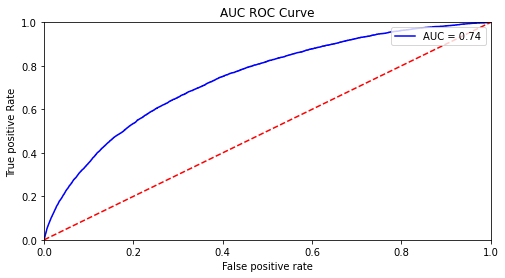

In [40]:
plt.figure(figsize=(8,4))
plt.plot(fpr,tpr,'b',label='AUC = %0.2f'%roc_auc)
plt.legend(loc='upper right')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive Rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('AUC ROC Curve');

In [41]:
#our baseline model has accuracy of 0.91 ,auc 0.74 but recall is only 0.01
#we apply pca to select feature that will help for identify model performance
#pca is used for dimesionality reduction
from sklearn.decomposition import PCA
pca = PCA()
pca_train = pca.fit_transform(train_xnorm)
pca_test = pca.fit_transform(train_xtestnorm)


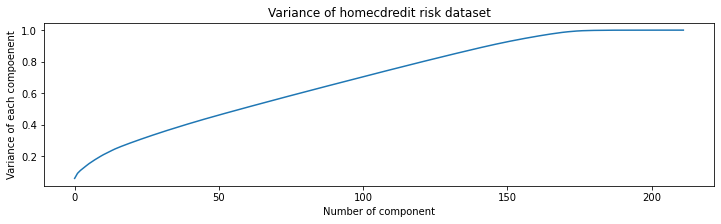

In [42]:
plt.figure(figsize=(12,3))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of component')
plt.ylabel('Variance of each compoenent')
plt.title('Variance of homecdredit risk dataset');


In [43]:
#from figure we can see that 150 components have variance around 95%
#so we can train our model with 150 components
pca = PCA(n_components=150)
pca_train = pca.fit_transform(train_xnorm)
pca_test = pca.fit_transform(train_xtestnorm)


In [44]:
log = LogisticRegression(penalty='l2',C=0.05,max_iter=500)
log.fit(pca_train,ytrain)

LogisticRegression(C=0.05, max_iter=500)

In [45]:
log.score(pca_test,ytest)

0.9113100786957747

In [46]:
pca_recall = recall_score(y_true=ytest, y_pred=log.predict(pca_test))
print(pca_recall)

0.013489815189531903


In [47]:
#since our recall is still low .it mens our data is imbalanced so we will use sampling and tree method to solve this.
#here we will use undersampling here because our dataset is large and oversampling will lead to overfitting

In [48]:
train_merged = np.concatenate((np.array(train_xnorm),np.array(ytrain).reshape(215257,1)),axis=1)
#train_xnorm.shape

In [49]:
from sklearn.utils import resample
majority = train_merged[train_merged[:,-1]==0]
minority = train_merged[train_merged[:,-1]==1]
downsample = resample(majority,replace=False,n_samples = minority.shape[0])
train_new = np.concatenate([downsample,minority])
train_xnew = train_new[:,:-1]
train_ynew = train_new[:,-1]

In [50]:
features = df_trainonehot.columns[df_trainonehot.columns!='TARGET']
train_xnew = pd.DataFrame(train_xnew,columns= features)
import re
train_xnew = train_xnew.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [51]:
#logistic regression
log_reg = LogisticRegression(penalty='l2',C=0.05,max_iter=500)
log_reg.fit(train_xnew,train_ynew)

LogisticRegression(C=0.05, max_iter=500)

In [52]:
log_reg.score(train_xtestnorm,ytest)

0.6848266741821493

In [53]:
recall = recall_score(ytest,log_reg.predict(train_xtestnorm))
print(recall)
aucroc = roc_auc_score(ytest,log_reg.predict_proba(train_xtestnorm)[:,1])
aucroc

0.6673411574261433


0.7402280912286113

although the accuracy drops to 68% the recall increase to 68% and auc score was same
now we will try tree model

In [54]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(train_xnew,train_ynew)
feature_importance = random_forest.feature_importances_


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [55]:
random_forest.score(train_xtestnorm,ytest)

0.6870379604136406

In [56]:
recall = recall_score(ytest,random_forest.predict(train_xtestnorm))
print(recall)
aucroc = roc_auc_score(ytest,random_forest.predict_proba(train_xtestnorm)[:,1])
aucroc

0.6647780925401322


0.7407650738325818

In [57]:
df_feature = pd.DataFrame({'feature':features,'importance':feature_importance})

In [58]:
def plot_fi(df):
    df = df.sort_values('importance',ascending=False).reset_index()
    #sort the value of importance in descending order
    df['Importance normalized'] = df['importance']/df['importance'].sum()
    plt.figure(figsize=(12,6))
    ax = plt.subplot()
    ax.barh(list(reversed(list(df.index[0:10]))),df['Importance normalized'].head(10),align = 'center')
    ax.set_yticks(list(reversed(list(df.index[0:10]))))
    ax.set_yticklabels(df['feature'].head(10))
    plt.xlabel('Normalized Importance')
    plt.title('Feature Importance')
    plt.show()

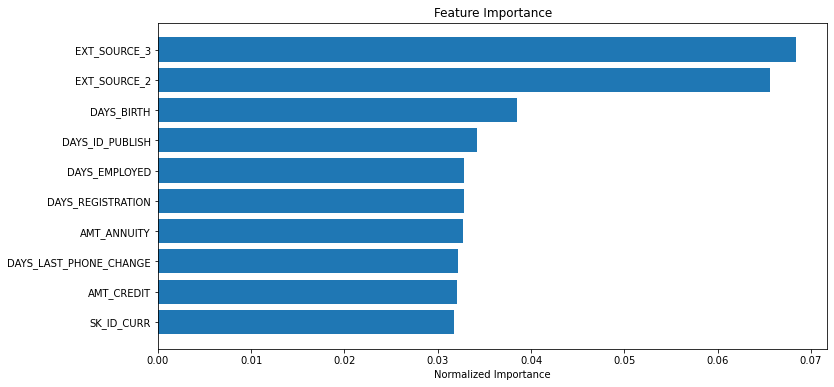

In [59]:
plot_fi(df_feature)

for this we can see that birthdate,daysemplyed,phone no last ahnged,annnuity are soe of the important features

Now we use another model here which is Light Gradient Boosting

In [60]:
import lightgbm as lgb

In [61]:
clf = lgb.LGBMClassifier(n_estimators=5000,objective='binary',class_weight='balanced',learning_rate=0.05,
                        reg_alpha=0.1,reg_lambda=0.1,subsample=0.8,random_state=50)
clf.fit(train_xnew,train_ynew,eval_metric='auc',verbose=200)

LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=5000,
               objective='binary', random_state=50, reg_alpha=0.1,
               reg_lambda=0.1, subsample=0.8)

In [62]:
predicted = clf.predict(train_xtestnorm)
accuracy = accuracy_score(ytest,predicted)
print(accuracy)
recall = recall_score(ytest,predicted)
print(recall)
aucroc = roc_auc_score(ytest,clf.predict_proba(train_xtestnorm)[:,1])
aucroc

0.6809786025538188
0.6476460272494267


0.7255797492581695

we have observed that model has auucray of 0.68,recall 0.64 and aucroc=0.72

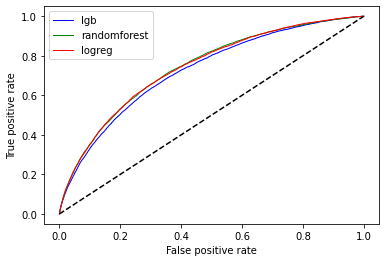

In [63]:
#showing aucroc curve for lightgbm
probs_l= [i[1] for i in list(clf.predict_proba(train_xtestnorm))]
fpr_l,tpr_l,thresholds_l = roc_curve(ytest,probs_l,pos_label=1)
probs_r= [i[1] for i in list(random_forest.predict_proba(train_xtestnorm))]
fpr_r,tpr_r,thresholds_r = roc_curve(ytest,probs_r,pos_label=1)
probs_lr = [i[1] for i in list(log_reg.predict_proba(train_xtestnorm))]
fpr_lr,tpr_lr,thresholds_lr = roc_curve(ytest,probs_lr,pos_label=1)
plt.plot(fpr_l,tpr_l,linewidth = 1,label='lgb',color= 'blue')
plt.plot(fpr_r,tpr_r,linewidth = 1,label='randomforest',color= 'green')
plt.plot(fpr_lr,tpr_lr,linewidth = 1,label='logreg',color= 'red')
plt.plot([0,1],[0,1],color='black',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()


To further improve our model performance,we will now try engineering new features

In [64]:
test_norm = pd.DataFrame(train_xtestnorm,columns=features)

In [65]:
train_norm = pd.DataFrame(train_xnorm,columns=features)

firstly,we take polynomial approach and create new feature with a degree of 2 using the variables that we found 
important earlier.New feature will include product of two ariable,sqaure of each choosen variable and etc.

In [66]:
#create interaction term
from sklearn.preprocessing import PolynomialFeatures
input_features_x = train_xnew[['DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_REGISTRATION',
                               'AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED','AMT_CREDIT']]
input_features_y = test_norm[['DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_REGISTRATION',
                               'AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED','AMT_CREDIT']]

In [67]:
poly_obj = PolynomialFeatures(degree=2)
#train_input features
poly_obj.fit(input_features_x)
features_n = poly_obj.transform(input_features_x)
#to see what those are
columns_n = poly_obj.get_feature_names(input_features=['DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_REGISTRATION',
                               'AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED','AMT_CREDIT'])
#creating dataframe for those features
df_newfeatures = pd.DataFrame(features_n,columns=columns_n)


In [68]:
#in addition we create percentage based on the aplicants age,credit,income
df_newfeatures.drop(['1','DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_REGISTRATION','AMT_ANNUITY',
                     'DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED','AMT_CREDIT'],axis=1,inplace=True)
train1 = train_xnew.join(df_newfeatures)
train1['Days_employed_per'] = train1['DAYS_EMPLOYED']/train1['DAYS_BIRTH']
train1['Days_registration_per'] =train1['DAYS_REGISTRATION']/train1['DAYS_BIRTH']
train1['Income_credit_per'] = train1['AMT_INCOME_TOTAL']/train1['AMT_CREDIT']
train1['Income_per_person'] = train1['AMT_INCOME_TOTAL']/train1['CNT_FAM_MEMBERS']
train1['Annuity_income_per'] = train1['AMT_ANNUITY']/train1['AMT_INCOME_TOTAL']
train1['Pyament_rate'] = train1['AMT_ANNUITY']/train1['AMT_CREDIT']
train1.drop(['SK_ID_CURR'],axis=1,inplace=True)

In [69]:
#create ploynomial object
poly_obj = PolynomialFeatures(degree=2)
poly_obj.fit(input_features_y)
features_n = poly_obj.transform(input_features_y)
#to see what those are
columns_n = poly_obj.get_feature_names(input_features=['DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_REGISTRATION',
                               'AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED','AMT_CREDIT'])
#creating dataframe for those features
df_newfeatures = pd.DataFrame(features_n,columns=columns_n)

In [70]:
df_newfeatures.drop(['1','DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_REGISTRATION','AMT_ANNUITY',
                     'DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED','AMT_CREDIT'],axis=1,inplace=True)
test1 = test_norm.join(df_newfeatures)
test1['Days_employed_per'] = test1['DAYS_EMPLOYED']/test1['DAYS_BIRTH']
test1['Days_registration_per'] =test1['DAYS_REGISTRATION']/test1['DAYS_BIRTH']
test1['Income_credit_per'] = test1['AMT_INCOME_TOTAL']/test1['AMT_CREDIT']
test1['Income_per_person'] = test1['AMT_INCOME_TOTAL']/test1['CNT_FAM_MEMBERS']
test1['Annuity_income_per'] = test1['AMT_ANNUITY']/test1['AMT_INCOME_TOTAL']
test1['Pyament_rate'] = test1['AMT_ANNUITY']/test1['AMT_CREDIT']
test1.drop(['SK_ID_CURR'],axis=1,inplace=True)

In [71]:
clf = lgb.LGBMClassifier(n_estimators=5000,objective='binary',class_weight='balanced',learning_rate=0.05,
                        reg_alpha=0.1,reg_lambda=0.1,subsample=0.8,random_state=50)
clf.fit(train1,train_ynew,eval_metric='auc',verbose=200)

LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=5000,
               objective='binary', random_state=50, reg_alpha=0.1,
               reg_lambda=0.1, subsample=0.8)

In [72]:
accuracy = accuracy_score(ytest,clf.predict(test1))
print(accuracy)
recall = recall_score(ytest,clf.predict(test1))
print(recall)
auc = roc_auc_score(ytest,clf.predict_proba(test1)[:,1])
print(auc)

0.684577362499187
0.6435990826925672
0.727710684042864


here we define this model as our final model since acurracy is almost 68% recall is 66% and auc is 72%

In [73]:
train1.columns

Index(['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       ...
       'DAYS_LAST_PHONE_CHANGE AMT_CREDIT', 'DAYS_EMPLOYED^2',
       'DAYS_EMPLOYED AMT_CREDIT', 'AMT_CREDIT^2', 'Days_employed_per',
       'Days_registration_per', 'Income_credit_per', 'Income_per_person',
       'Annuity_income_per', 'Pyament_rate'],
      dtype='object', length=245)

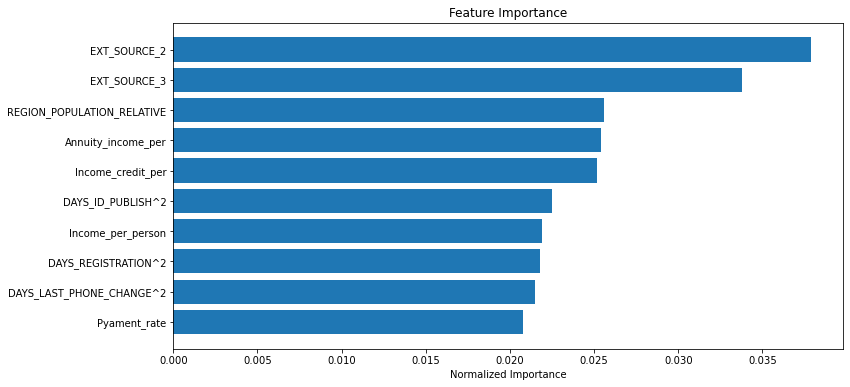

In [74]:
important_feature = clf.feature_importances_
feature_important = pd.DataFrame({'feature':train1.columns,'importance':important_feature})
plot_fi(feature_important)

our model has done much better job of balancing the classes and imporiving the recall from 0.01 to 0.66 
applying different technique and machine learning model.This model has population region cliet live in,
income per person,auunity income ,change of client id etc as important features.

In [75]:
#xgboost


In [77]:
train_labels = df_train['TARGET']
df_data = df_train.drop(['TARGET'],axis=1)


In [78]:
print('Traning feature shape',df_data.shape)
print('Data feature shape',df_train.shape)

Traning feature shape (307511, 212)
Data feature shape (307511, 213)


In [79]:
df_train.fillna(0,inplace=True)

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_data,train_labels,test_size=0.3)

we will explore the package call shap which will helps us behind the decision making of the data

In [83]:
import shap

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [84]:
import xgboost

In [85]:
model = xgboost.train({'learning_rate':0.01},xgboost.DMatrix(X_train,label=y_train),100)

In [87]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df_data)

In [90]:
prediction = model.predict(xgboost.DMatrix(df_data))

vislualizing each application predictions and understanding thos feature that are making these decision

Target 1
Predicted 0.37850732


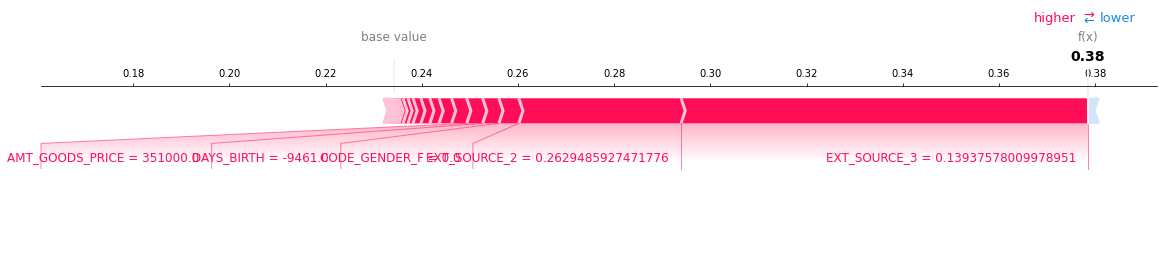

In [91]:
print('Target',train_labels[0])
print('Predicted',prediction[0])
shap.force_plot(explainer.expected_value,shap_values[0,:],df_data.iloc[0,:],matplotlib=True)

Above figure shows that ext_source3,ext_source2,days_birth,gender_code is very bad wi=hich indicate that aaplicant will
deafault their loan.
Here,we can send a message saying your ex_source2,ext_source3,age are not qualified to give loan

Target 0
Predicted 0.20606342


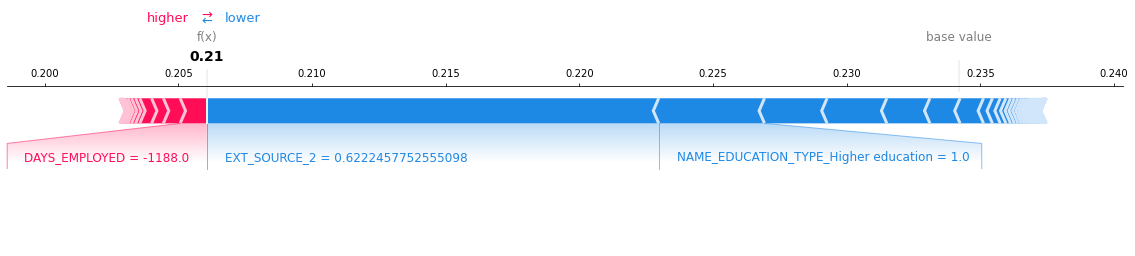

In [92]:
#visalizing the second prection explanation
print('Target',train_labels[1])
print('Predicted',prediction[1])
shap.force_plot(explainer.expected_value,shap_values[1,:],df_data.iloc[1,:],matplotlib=True)

Here it shows that days_employed is very bad since ext_source2 is good it means that user will not deafault his/her loan.
.we can send message saying your days_employed is bad but ext_source 2 and euaction is good enough for use to give loan


Target 0
Predicted 0.34310395


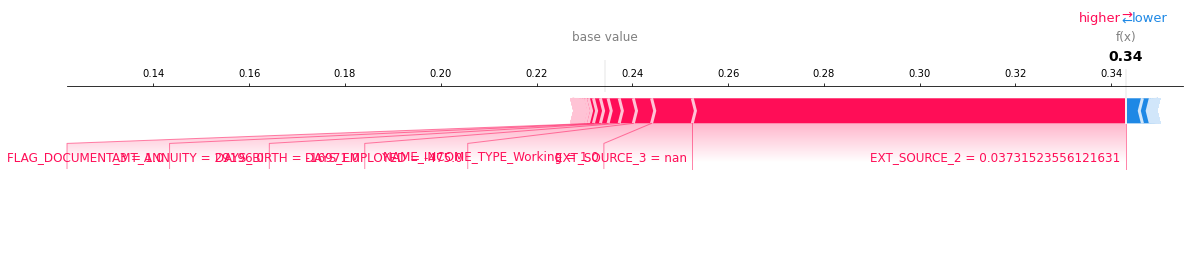

In [93]:
#for 41 prediction explanation
print('Target',train_labels[41])
print('Predicted',prediction[41])
shap.force_plot(explainer.expected_value,shap_values[41,:],df_data.iloc[41,:],matplotlib=True)

here we can say that your ext_souce2,ext_source3 ,age and others features are not good enough for us to give loan.
In this way can make prediction for diffrent applicant